<a href="https://colab.research.google.com/github/jod35/Hand-written-digit-classifier/blob/master/First_Keras_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Activation,Flatten
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
np.random.seed(123)

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#load the pre-shuffled data into train ana test sets

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#load the pre-shuffled data into train ana test sets

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#load the pre-shuffled data into train ana test sets

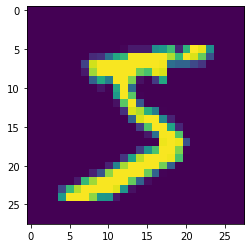

In [6]:
plt.imshow(X_train[0])

In [7]:
#the images have the shape(n,width,height)
#we want to transform the shape to (n,depth,width,height)

X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
#converting datatypes and normalizing values
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [9]:
print(y_train.shape)
print(y_train[:10])

#convert 1 dimensional class labels to 10 distinct class labels
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

print(y_train.shape)

#defining a model arch
model=Sequential()


# we then declare the input layer which is Convolution2D in this case
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

print(model.output_shape)

#add more layers to our model
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)
(None, 26, 26, 32)


In [10]:
# fully connected dense layers
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [11]:
#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#fitting the model on training data
model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 110s 58ms/step - loss: 0.2085 - accuracy: 0.9365
Epoch 2/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0876 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0675 - accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0553 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0468 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0356 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0315 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] 

In [13]:
#evaluating our model
score=model.evaluate(X_test,y_test,verbose=0)

In [14]:
print(score)

[0.02956344373524189, 0.9922000169754028]
